### import dependencies 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### Read Dataset

In [4]:
df = pd.read_csv('economic_index.csv')
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


### Independent Features - 'interest_rate' and 'unemployment_rate'. Dependent Feature - 'index_price' 
### So , we will drop 'year' , 'month' , 'Unnamed' columns 

In [5]:
# df.drop(columns=['Unnamed: 0' , 'month', 'year'] , axis=1 , inplace=True)
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


### Check Null Values

In [6]:
df.isnull().sum()

Unnamed: 0           0
year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

### Find Correlation Between DataPoints

In [7]:
df.corr()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
Unnamed: 0,1.000000,-8.667781e-01,-4.986939e-01,-0.934555,0.935300,-0.988246
year,-0.866778,1.000000e+00,7.884865e-14,0.882851,-0.877000,0.863232
month,-0.498694,7.884865e-14,1.000000e+00,0.339526,-0.351189,0.481287
interest_rate,-0.934555,8.828507e-01,3.395257e-01,1.000000,-0.925814,0.935793
unemployment_rate,0.935300,-8.769997e-01,-3.511891e-01,-0.925814,1.000000,-0.922338
index_price,-0.988246,8.632321e-01,4.812873e-01,0.935793,-0.922338,1.000000


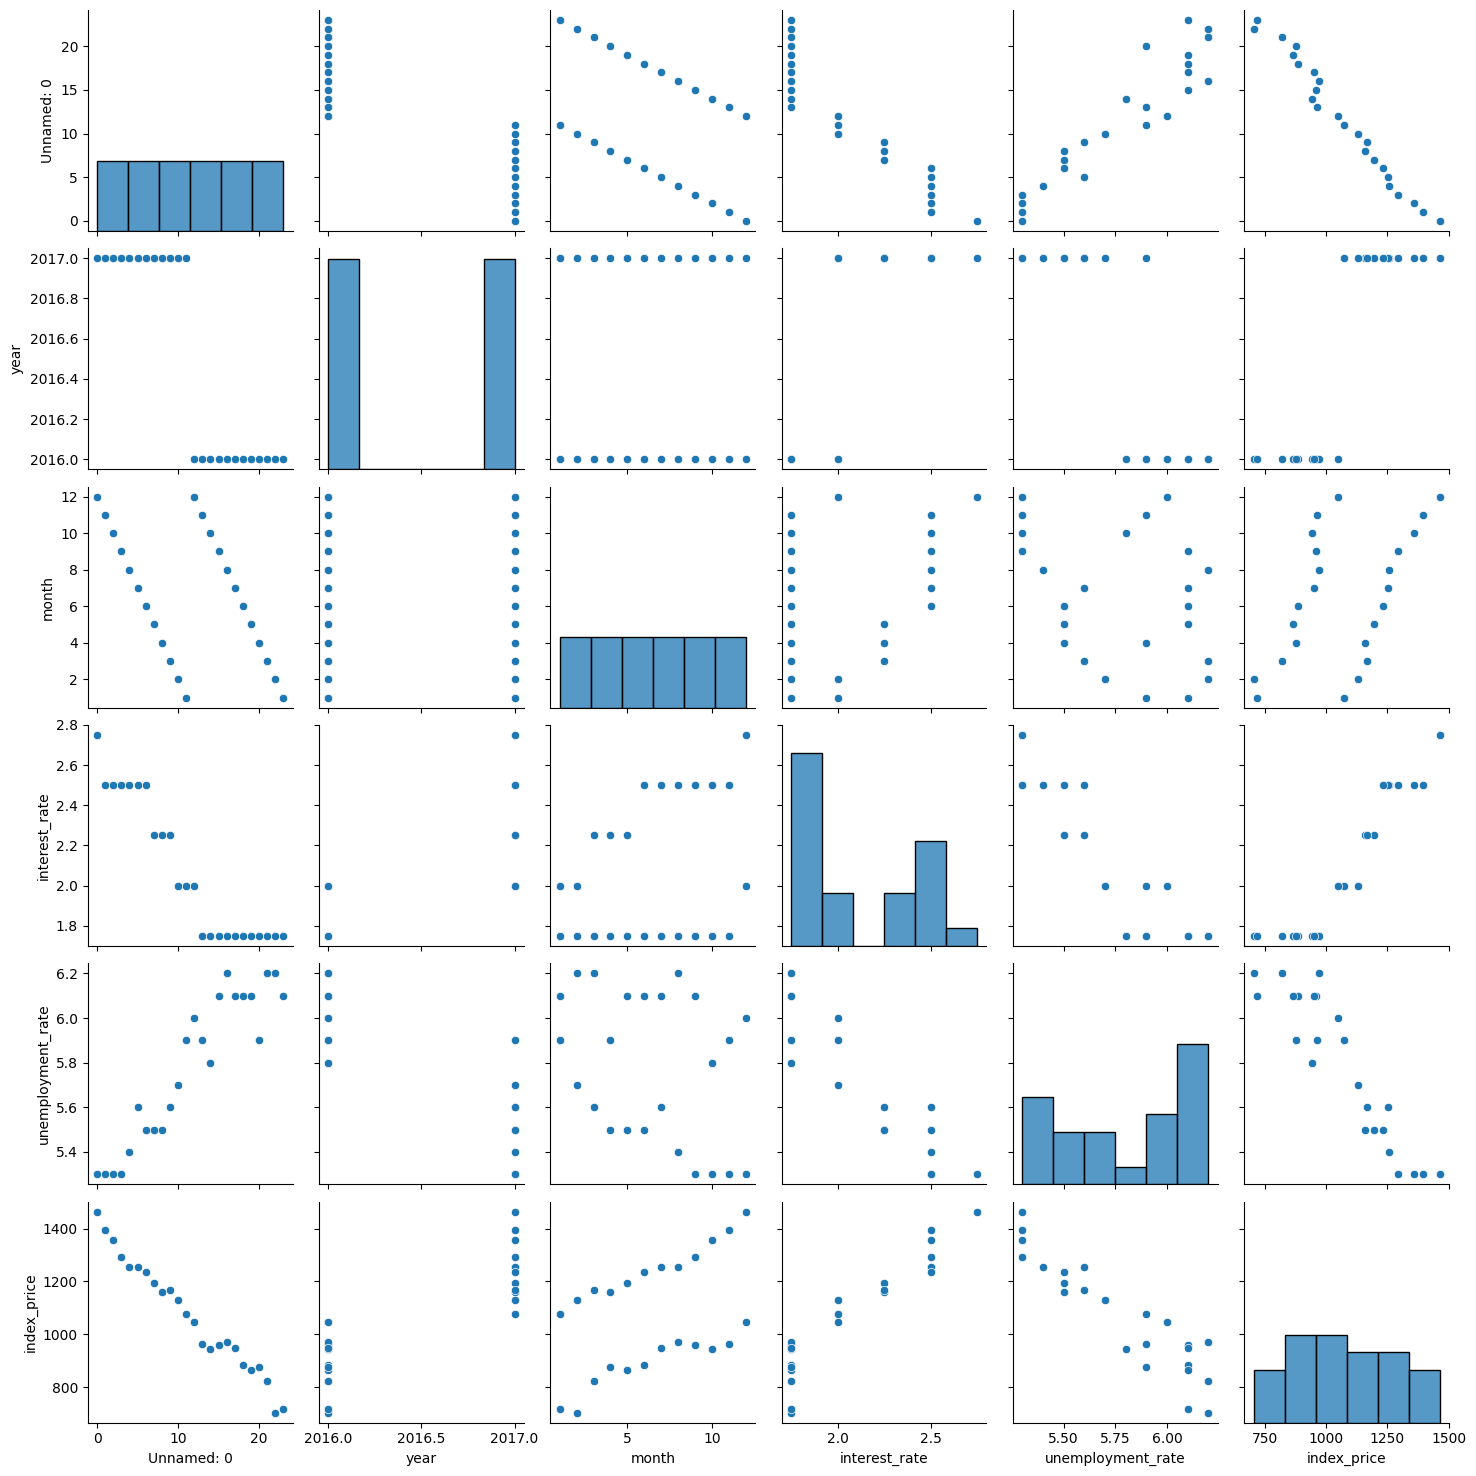

In [8]:
sb.pairplot(df)

### Conclusion - As the 'interest_rate' increases the 'index_price' also increases and as the 'unemployment_rate' increases the 'index_price' decreases .

### Visualise the datapoints more closely

Text(0, 0.5, 'Unemployment Rate')

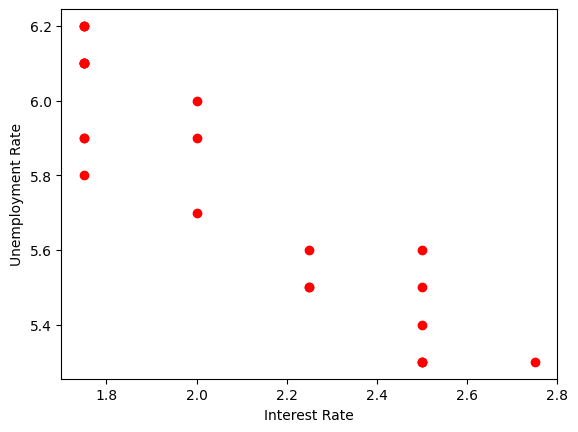

In [9]:
plt.scatter(df['interest_rate'] , df['unemployment_rate'] , color = 'r')
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

In [10]:
X = df[['interest_rate' , 'unemployment_rate']] 
# OR X = df.iloc[: , : , -1]
Y = df['index_price']
# OR Y = df.iloc[: , -1]

In [11]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [12]:
Y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

### Split Dataset into Train and Test

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.25 , random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

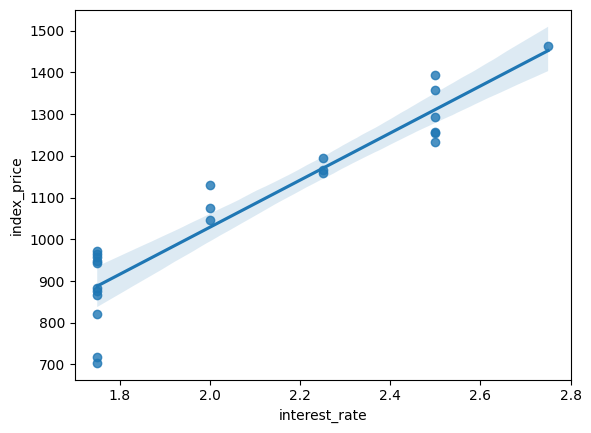

In [15]:
sb.regplot(x=df['interest_rate'] , y=df['index_price'])

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

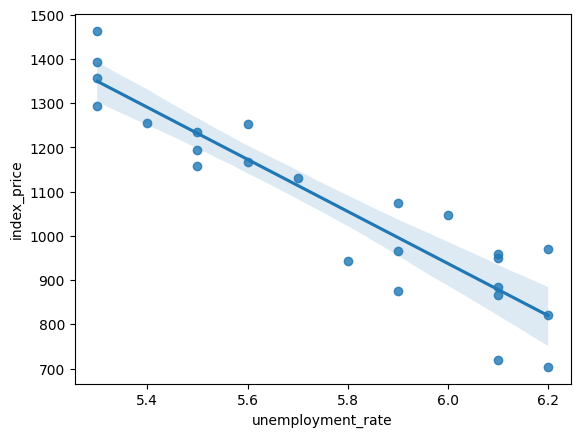

In [16]:
sb.regplot(x=df['unemployment_rate'] , y=df['index_price'])

### Standardisation 

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [19]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [20]:
regression.fit(X_train , Y_train)

LinearRegression()

### Coefficients 

In [45]:
regression.coef_

array([  88.27275507, -116.25716066])

### Intercept 

In [46]:
regression.intercept_

np.float64(1053.4444444444443)

### Cross - Validation 

In [21]:
from sklearn.model_selection import cross_val_score

In [24]:
validation_score = cross_val_score(regression , X_train , Y_train , scoring = 'neg_mean_squared_error' , cv=3)

In [25]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

### Now , Mean Validation Score 

In [26]:
print(np.mean(validation_score))

-5914.828180162388


### Prediction 

In [28]:
Y_pred = regression.predict(X_test)
Y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

### Performance Metrics

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [30]:
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [31]:
from sklearn.metrics import r2_score

In [32]:
score=r2_score(Y_test,Y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))

0.7591371539010257
0.5985619231683761


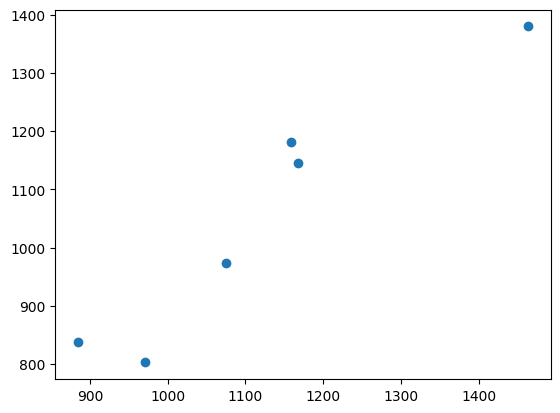

In [33]:
plt.scatter(Y_test , Y_pred)

### Calculate Errors ( Residuals )


In [34]:
residuals = Y_test - Y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


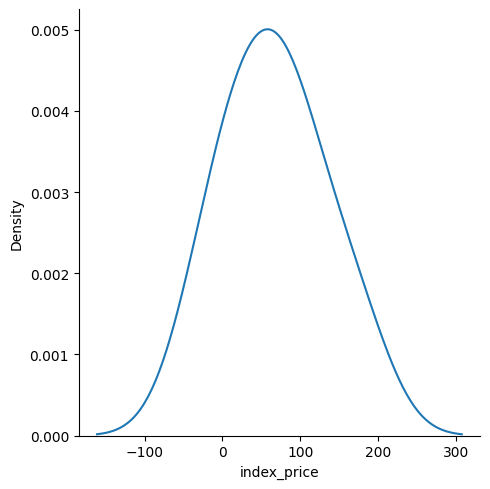

In [35]:
sb.displot(residuals , kind='kde')

### We got Normal Distribution => Our model has performed well .

### Scatter plot with respect to prediction and residuals 

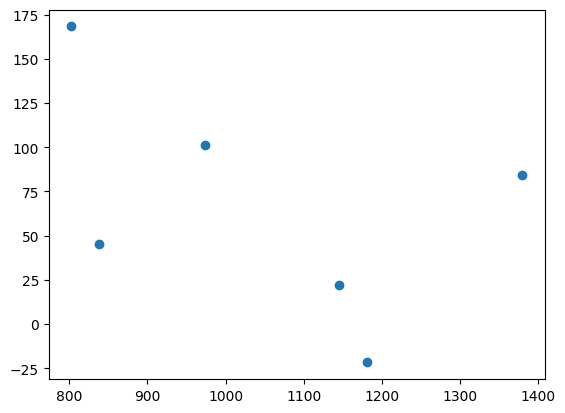

In [36]:
plt.scatter(Y_pred , residuals)

### Conclusion - Data is uniformly distributed

### OLS Linear Regression 

In [40]:
import statsmodels.api as sm

In [42]:
model = sm.OLS(Y_train , X_train).fit()